<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Preparing-Data" data-toc-modified-id="Preparing-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reshaping-and-scaling-input-data" data-toc-modified-id="Reshaping-and-scaling-input-data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Reshaping and scaling input data</a></span></li><li><span><a href="#Reshaping-Target-variable" data-toc-modified-id="Reshaping-Target-variable-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Reshaping Target variable</a></span></li><li><span><a href="#Viewing-Training-Data" data-toc-modified-id="Viewing-Training-Data-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Viewing Training Data</a></span></li></ul></li></ul></li><li><span><a href="#Constructing-CNN" data-toc-modified-id="Constructing-CNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Constructing CNN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Base-line-Model_1:-LeNet---5" data-toc-modified-id="Base-line-Model_1:-LeNet---5-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Base line Model_1: LeNet - 5</a></span></li></ul></li><li><span><a href="#Reducing-Bias" data-toc-modified-id="Reducing-Bias-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reducing Bias</a></span><ul class="toc-item"><li><span><a href="#Base-Line-Model_2" data-toc-modified-id="Base-Line-Model_2-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Base Line Model_2</a></span></li></ul></li><li><span><a href="#Reducing-Variance" data-toc-modified-id="Reducing-Variance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reducing Variance</a></span><ul class="toc-item"><li><span><a href="#Base-line-+-L2-Regularization" data-toc-modified-id="Base-line-+-L2-Regularization-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Base line + L2 Regularization</a></span></li><li><span><a href="#Base-line-+-Dropout-Regularization" data-toc-modified-id="Base-line-+-Dropout-Regularization-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Base line + Dropout Regularization</a></span></li></ul></li><li><span><a href="#Base-line-+-Dropout-+-Data-Augmentation" data-toc-modified-id="Base-line-+-Dropout-+-Data-Augmentation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Base line + Dropout + Data Augmentation</a></span></li><li><span><a href="#Base-Line-+-Data-Augmentation" data-toc-modified-id="Base-Line-+-Data-Augmentation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Base Line + Data Augmentation</a></span></li></ul></li><li><span><a href="#Final-Model-Summary" data-toc-modified-id="Final-Model-Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Model Summary</a></span></li><li><span><a href="#Checking-missclassifications" data-toc-modified-id="Checking-missclassifications-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Checking missclassifications</a></span></li><li><span><a href="#Future-work" data-toc-modified-id="Future-work-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Future work</a></span></li></ul></div>

This notebook classify apparel images into right categories by building and optimising Convolutional Neural Network (CNN) using Keras. 

**Dataset:** Fashion-MNIST is a dataset consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

**Approach:** Started with building a baseline model and then optimizing its architecture using different regularization methods for maximising test accuracy. Post selecting the best model we dig deep into missclassification errors and where we are going wrong. 

**keywords for models:** CNN, L2 Regularzation, Dropout Regularization, Data Augmentation, Pooling, batch normalization callbacks, softmax, cross-entropy loss.  

**Result** With limited iterations we could achieve 92.28% test accuracy with baseline and drop out regularization model. 

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.random.seed(123)  # for reproducibility

In [165]:
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import InputLayer, Conv2D, MaxPooling2D,AveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils  # For data transformation'
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import  BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# Preparing Data

In [6]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Reshaping and scaling input data

In [7]:
print('x_train_shape ' + str(x_train.shape))
print('y_train_shape ' + str(y_train.shape))

x_train_shape (60000, 28, 28)
y_train_shape (60000,)


We have only one channel. So reshaping for consistancy and scaling data. 

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Scaling
x_train = x_train/255.0
x_test = x_test/255.0

### Reshaping Target variable

In [9]:
# print(y_train.shape)
# Converting y into a matrix with binary ouput for each of the 10 categories

y_train_matrix = np_utils.to_categorical(y_train, 10)
y_test_matrix = np_utils.to_categorical(y_test, 10)

print(y_train_matrix.shape)

(60000, 10)


Defining Labels for the Target variable

In [10]:
labels = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

### Viewing Training Data

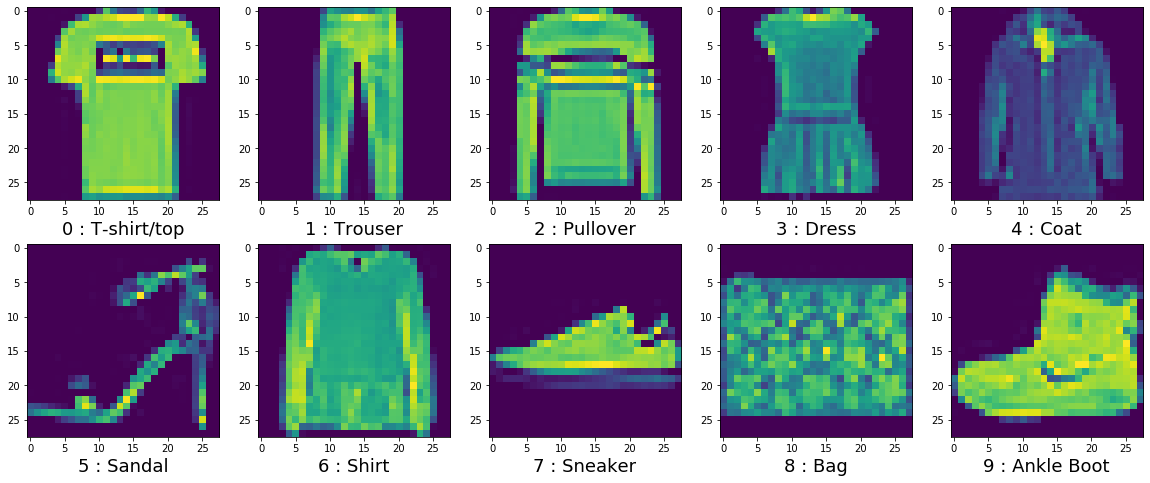

In [204]:
figure = plt.figure(figsize=(20, 8))
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[y_train == i][0][:,:,0])
    plt.xlabel(str(i)+ " : " + labels[i],fontsize=18)

Each target variable has same number of training samples. 

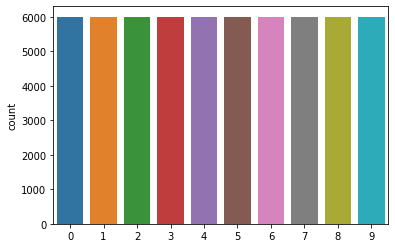

In [12]:
import seaborn as sns
sns.countplot(y_train)

# Constructing CNN

### Base line Model_1: LeNet - 5

![LeNet](LeNet5-fm.png)

In [13]:
model1 = Sequential([
    Conv2D(filters=6, kernel_size=(5,5),strides = 1,  activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(16, kernel_size= (5,5),strides = 1, activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

In [14]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history = model1.fit(x_train, y_train_matrix,validation_data = (x_test, y_test_matrix), 
                     epochs= 40, 
                     batch_size= 32, verbose=0)

In [17]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


plot of accuracy on the training and validation set w.r.t number of iterations (# epochs)

In [18]:
def plot_accuracy_loss(history):
    
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy w.r.t epoch')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(2,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss w.r.t epoch')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [19]:
def evaluate_train_test(model, x_train, y_train, x_test, y_test):
    train = model.evaluate(x_train, y_train, verbose=0)
    test = model.evaluate(x_test, y_test, verbose=0)
    
    print('train accuracy is ' + str(train[1]))
    print('test accuracy is ' + str(test[1]))

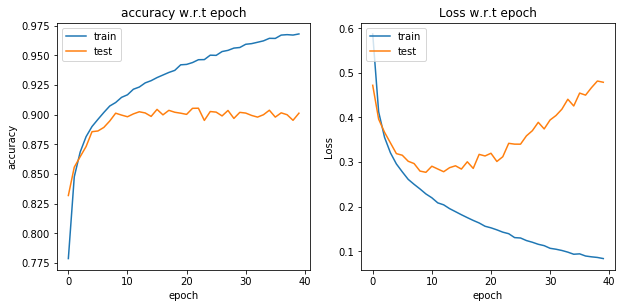

In [20]:
plot_accuracy_loss(history)

In [23]:
evaluate_train_test(model1, x_train, y_train_matrix, x_test, y_test_matrix)

train accuracy is 0.9724833369255066
test accuracy is 0.901199996471405


Training accuarcy is close to 97% whereas validation set accuracy is around 90% only. Thus we have a high variance problem here. Lets see if we can reduce bias further and then we will focus on reducing the variance (improving accuracy of test set).


Also if we observe the loss vs epoch for the test data, it increases after certain epochs (ovrfitting), thus we will be using callbacks for early stopping and hence preventing overfitting.

## Reducing Bias

There is 3% chance of improvement in training accuracy. Tweaking the model to check if a deeper Neural network can reduce this bias and its impact on the test data. Also I am using batch normalization as that makes the computation much faster with slight regularization effect. 

### Base Line Model_2

In [26]:
model2 = Sequential([
    Conv2D(32, kernel_size=(5,5),strides = 1,  activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Conv2D(64, kernel_size= (5,5),strides = 1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Conv2D(128, kernel_size= (3,3),strides = 1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [27]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
# deining Callbacks
callbacks2use = [
        # reduce learning rate by a factor of 5 (i.e. lr/=5.0) 
        # if val_loss does not reduce for 3 epochs
        ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3),
        # Stop training if val_acc does not improve for
        # 5 or more epochs
        EarlyStopping(monitor='val_accuracy', patience=6)]

In [29]:
history2 = model2.fit(x_train, y_train_matrix, epochs= 30, 
                     batch_size= 32, verbose=0,validation_data = (x_test, y_test_matrix), callbacks = callbacks2use, shuffle = True)

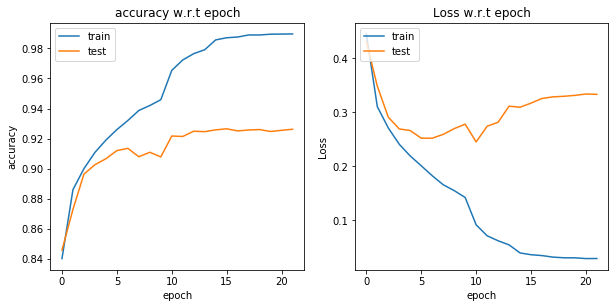

In [30]:
plot_accuracy_loss(history2)

In [31]:
evaluate_train_test(model2, x_train, y_train_matrix, x_test, y_test_matrix)

train accuracy is 0.9942666888237
test accuracy is 0.9261999726295471


With the deeper NN Network both our train and test accuracy has improved. The gap between the two suggests that there is overfitting happening on the training data. So we will now try different regularization methods to bring down this overfitting (variance).

## Reducing Variance

We will try three popular methods to reduce overfitting:
    - L2 regularization
    - Dropout regularization
    - Data Augmentation

### Base line + L2 Regularization

In [38]:
l2_loss_lambda = 0.0015   #Hyperparameter
l2 = regularizers.l2(l2_loss_lambda)

model3 = Sequential([                
    Conv2D(filters=32, kernel_size=(5,5),strides = 1,  
           activation='relu', input_shape=(28, 28, 1),kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Conv2D(64, kernel_size= (5,5),strides = 1, activation='relu', kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Conv2D(128, kernel_size= (3,3),strides = 1, activation='relu', kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu',kernel_regularizer=l2),
    BatchNormalization(),
    Dense(256, activation='relu',kernel_regularizer=l2),
    Dense(10, activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [39]:
history3 = model3.fit(x_train, y_train_matrix, epochs= 40, 
                     batch_size= 32, verbose=0,validation_data = (x_test, y_test_matrix), 
                      callbacks = callbacks2use)


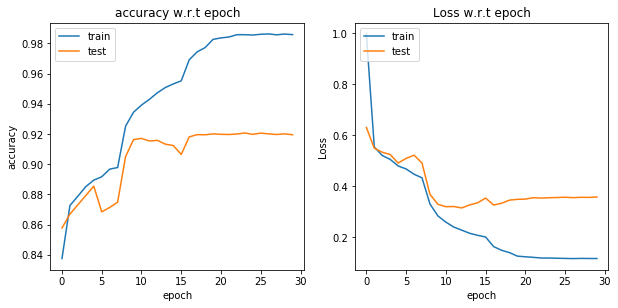

In [40]:
plot_accuracy_loss(history3)

In [35]:
evaluate_train_test(model3, x_train, y_train_matrix, x_test, y_test_matrix)

train accuracy is 0.9864000082015991
test accuracy is 0.9175000190734863


Our test accuracy improves by . Also the train accuracy decrease, which is expected. Lets see if the test accuracy is better with Dropout regularization. 

### Base line + Dropout Regularization

In [42]:
drop_rate = 0.20
adam = Adam(lr=0.0001, decay=1e-6)

model4 = Sequential([                
    Conv2D(filters=32, kernel_size=(5,5),strides = 1,  
           activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Dropout(drop_rate),
    Conv2D(64, kernel_size= (5,5),strides = 1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Dropout(drop_rate),
    Conv2D(128, kernel_size= (3,3),strides = 1, activation='relu'),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Flatten(),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [43]:
history4 = model4.fit(x_train, y_train_matrix, epochs= 40, 
                     batch_size= 32, verbose=0,validation_data = (x_test, y_test_matrix), 
                      callbacks = callbacks2use)



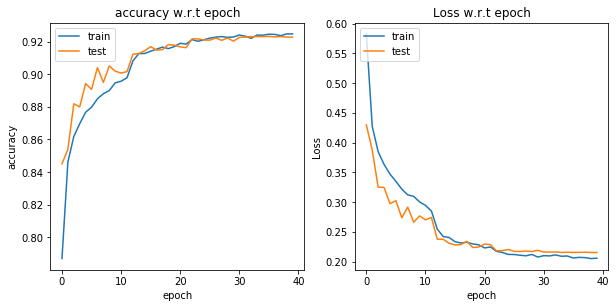

In [44]:
plot_accuracy_loss(history4)

In [45]:
evaluate_train_test(model4, x_train, y_train_matrix, x_test, y_test_matrix)

train accuracy is 0.9473000168800354
test accuracy is 0.9228000044822693


## Base line + Dropout + Data Augmentation

In [73]:
drop_rate = 0.20

model5 =  Sequential([                
    Conv2D(filters=32, kernel_size=(5,5),strides = 1,  
           activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(64, kernel_size= (5,5),strides = 1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(128, kernel_size= (3,3),strides = 1, activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Flatten(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=False, 
    fill_mode='nearest')

#train_datagen.fit(X_train)
# fit the data generator on training data & validate on
batch_size = 32
num_batches = len(x_train) // batch_size
num_batches += (0 if len(x_train) % batch_size == 0 else 1)     

history5 = model5.fit_generator(train_datagen.flow(x_train, y_train_matrix, 
                                                 batch_size=batch_size),
                              steps_per_epoch = num_batches, 
                              epochs = 30,
                              callbacks = callbacks2use,
                              validation_data = (x_test, y_test_matrix), verbose = 0)        

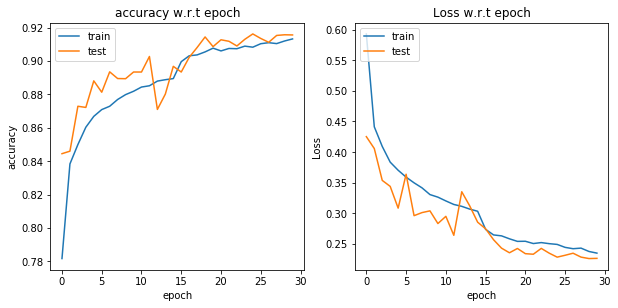

In [75]:
plot_accuracy_loss(history5)

In [76]:
evaluate_train_test(model5, x_train, y_train_matrix, x_test, y_test_matrix)

train accuracy is 0.9333000183105469
test accuracy is 0.9156000018119812


## Base Line + Data Augmentation

In [77]:

adam = Adam(lr=0.0005, decay=1e-6)

model6 = Sequential([
    Conv2D(32, kernel_size=(5,5),strides = 1,  activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Conv2D(64, kernel_size= (5,5),strides = 1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Conv2D(128, kernel_size= (3,3),strides = 1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    BatchNormalization(),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [78]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=False, 
    fill_mode='nearest')

#train_datagen.fit(X_train)
# fit the data generator on training data & validate on
batch_size = 32
num_batches = len(x_train) // batch_size
num_batches += (0 if len(x_train) % batch_size == 0 else 1)     

history6 = model6.fit_generator(train_datagen.flow(x_train, y_train_matrix, 
                                                 batch_size=batch_size),
                              steps_per_epoch = num_batches, 
                              epochs = 30,
                              callbacks = callbacks2use,
                              validation_data = (x_test, y_test_matrix), verbose = 0)    

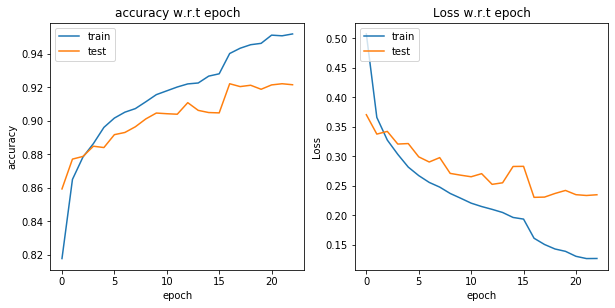

In [79]:
plot_accuracy_loss(history6)

In [80]:
evaluate_train_test(model6, x_train, y_train_matrix, x_test, y_test_matrix)

train accuracy is 0.9605500102043152
test accuracy is 0.921500027179718


# Final Model Summary

In [94]:
models = [model1,model2,model3,model4, model5, model6]
model_name = ['Base Line 1', 'Base Line 2', 'Base Line + L2 Regularization', 'Base Line + Dropout Regularization',
             'Base Line + Dropout + Data Augmentation', 'Base Line + Data Augmentation']

def model_summary_df(model_list, name_list, x_train, y_train, x_test, y_test):
    cols = ['Model Type', 'Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss']
    model_summary = pd.DataFrame(columns = cols)
    for i,m in enumerate(model_list):
        tr_acc = m.evaluate(x_train, y_train, verbose=0)[1]
        te_acc = m.evaluate(x_test, y_test, verbose=0)[1]
        tr_loss = m.evaluate(x_train, y_train, verbose=0)[0]
        te_loss = m.evaluate(x_test, y_test, verbose=0)[0]

        model_m = pd.DataFrame([[name_list[i],tr_acc, te_acc, tr_loss, te_loss]], columns = cols)
        model_summary = model_summary.append(model_m)

    return model_summary
    


In [95]:
summary = model_summary_df(models, model_name, x_train, y_train_matrix, x_test, y_test_matrix)

In [99]:
summary.reset_index().drop(columns = 'index')

,Model Type,Train Accuracy,Test Accuracy,Train Loss,Test Loss
0,Base Line 1,0.972483,0.9012,0.072328,0.478938
1,Base Line 2,0.994267,0.9262,0.019902,0.332933
2,Base Line + L2 Regularization,0.991200,0.9195,0.105017,0.358018
3,Base Line + Dropout Regularization,0.947300,0.9228,0.145863,0.215317
4,Base Line + Dropout + Data Augmentation,0.933300,0.9156,0.175355,0.226256
5,Base Line + Data Augmentation,0.960550,0.9215,0.104876,0.235070


# Checking missclassifications

In [100]:
from sklearn.metrics import classification_report
y_test = np.argmax(y_test_matrix, axis=1) # Converting matrix into array
y_pred = model4.predict_classes(x_test)
print(classification_report(y_test, y_pred, target_names = labels.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.86      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.90      0.88      1000
       Dress       0.91      0.94      0.92      1000
        Coat       0.89      0.86      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.77      0.78      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [224]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, class_, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold')
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True labels', fontweight='bold')
    plt.xlabel('Predicted labels', fontweight='bold')
    plt.show()

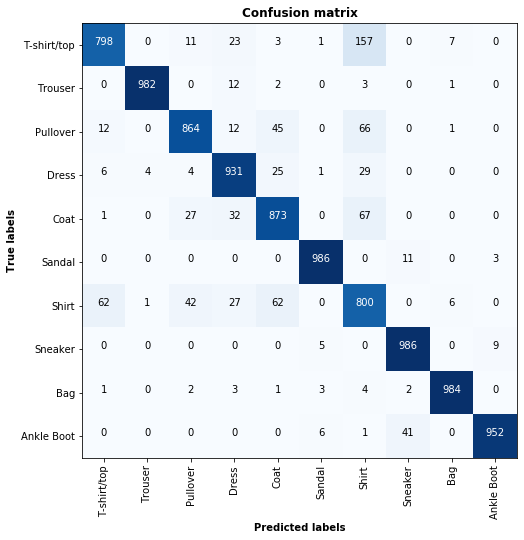

In [221]:
plt.figure(figsize=(12,8))
predictions = model5.predict_classes(x_test, verbose=0)
plot_confusion_matrix(confusion_matrix(y_test, predictions), labels.values())

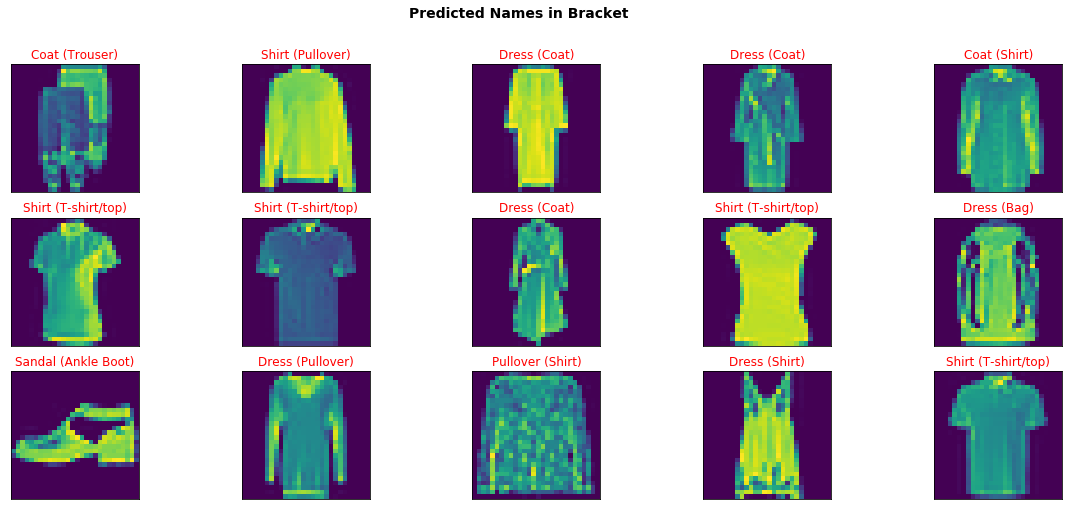

In [227]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
a = np.where(predictions != y_test)[0]
missclassified_index = a.reshape(a.shape[0])
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(missclassified_index, size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predictions[index]], 
                                  labels[y_test[index]]),
                                  color=("green" if y_test[index] == predictions[index] else "red"))
    figure.suptitle('Predicted Names in Bracket', size=14, fontweight='bold')
    

Inside bracket is the true label. Shirt, court, Pullover and T-shirt/top have the most numbere of errors in prediction. It makes sense and is expected as all the items look similar even to human eye. 

# Future work

Within a limited number of iterations we have achieved a good accuracy (92.3%) for our test data. But we should explore more to decrease the variance further. Thus trying a deeper neural network followed by more tuning and combination of different regularization method is required to be sure that we have achieved the best accuracy possible. 